Nous allons travailler sur le jeux de données **bank-full.csv** de kaggle
Données relatives aux campagnes de marketing direct d'une institution bancaire portugaise.
À propos de l'ensemble de données

**Description des données:**
Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plusieurs contacts avec le même client étaient nécessaires, pour y accéder si le produit (dépôt à terme bancaire) était (oui) ou non (non) souscrit.

## **Importation de données**

In [3]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
banque=pd.read_csv("bank-full.csv")
banque

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
banque.drop(columns='contact',inplace=True)
# creation de la variable cible en variable  binaire
banque['response_binary'] = 1  # Par défaut '1' pour les autres valeurs
banque.loc[banque['Target'] == 'no', 'response_binary'] = 0
print(banque['response_binary'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response_binary, Length: 45211, dtype: int64


**Description de la base de données "bank_full.csv"**

La base de données "bank_cleaned.csv" contient des données sur les campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. Les données ont été nettoyées et préparées pour l'analyse.

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :

-age : l'âge du client (variable numérique)

-job : la profession du client (variable catégorielle)

-marital : l'état matrimonial du client (variable catégorielle)

-education : le niveau d'éducation du client (variable catégorielle)

-default : indique si le client a un crédit en défaut ou non (variable catégorielle)

-balance : le solde du compte du client (variable numérique)

-housing : indique si le client a un prêt immobilier ou non (variable catégorielle)

-loan : indique si le client a un prêt personnel ou non (variable catégorielle)

-day : le jour du mois de la dernière communication avec le client (variable numérique)

-month : le mois de la dernière communication avec le client (variable catégorielle)

-duration : la durée de la dernière communication avec le client, en secondes (variable numérique)

-campaign : le nombre de contacts effectués au cours de cette campagne pour ce client (variable numérique)

-pdays : le nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente (variable numérique ; 999 signifie que le client n'a pas été contacté précédemment)

-previous : le nombre de contacts effectués avant cette campagne pour ce client (variable numérique)

-poutcome : le résultat de la précédente campagne marketing (variable catégorielle)

-response : la réponse du client à la dernière campagne marketing (variable catégorielle)

-response_binary : la réponse du client à la dernière campagne marketing, encodée en binaire (0 = pas intéressé, 1 = intéressé) (variable numérique)

La variable cible est :

    response_binary : a-t-il souscrit un dépôt à terme ? (variable catégorielle)

Les données ont été préparées pour l'analyse en remplaçant les valeurs manquantes par des valeurs médianes ou moyennes, en convertissant les variables catégorielles en variables binaires, et en supprimant les variables inutiles ou redondantes.

**Nous allons remomer les colonnes en francais**

In [6]:
banque.rename(columns= { 'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'Target': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'} , inplace=True)
# creation de la variable cible en variable  binaire


In [7]:
# dimension du dataset
print(banque.shape)
print(banque.info())

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                45211 non-null  int64 
 1   profession                         45211 non-null  object
 2   situation_familiale                45211 non-null  object
 3   niveau_etudes                      45211 non-null  object
 4   defaut_credit                      45211 non-null  object
 5   solde_bancaire                     45211 non-null  int64 
 6   pret_immobilier                    45211 non-null  object
 7   pret_personnel                     45211 non-null  object
 8   jour_du_mois                       45211 non-null  int64 
 9   mois                               45211 non-null  object
 10  duree_appel                        45211 non-null  int64 
 11  nb_appels                          45211 non-null  int6

Nous avons **17 variables et 45211 lignes** et Nous nous rendons compte qu'il n ya pas de valeurs nulles dans ce jeux de données .Nous allons à present passer à une analyse plus approfondie du jeux de donnée.

In [8]:
# description des données 
banque.describe(include='all')# le include =all pour décrire toutes les variables par défaut nius avons juste la description des des variables numeriques 

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211,45211.000000
unique,NaN,12,3,4,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,4,2,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,no,NaN
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,NaN,13766,NaN,NaN,NaN,NaN,36959,39922,NaN
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN,0.116985
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,0.000000


**Nous allons essayer de comprendre nos Variables** 

**age**:L'age moyen est 40 ans . Nous nous rendons également compte que le moins agé a 18 ans et le plus agé 95 ans et que 50% des individus ont ont loins de 39 ans et 50% ont plus de de 39 ans

**Profession**: Dans notre jeux de données nous avons 12 profession et la profession qui apparait le pluse est  blue-collar(ouvrier) (9732)

faire pareil pour les autres variables 

#### **Analyse univariée**

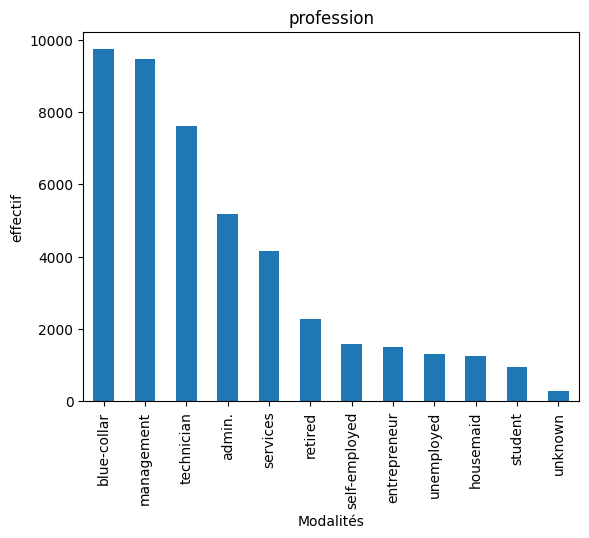

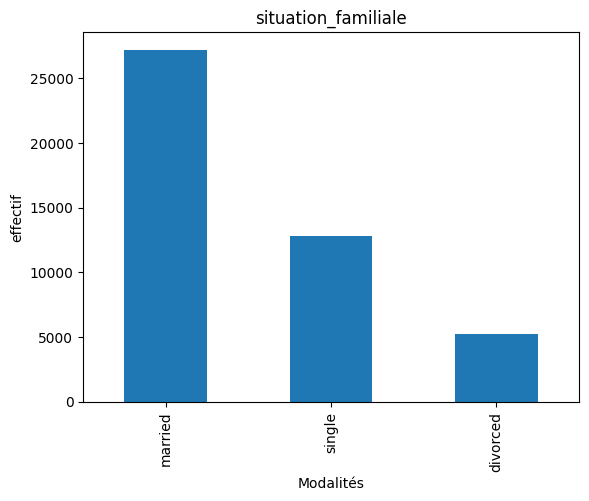

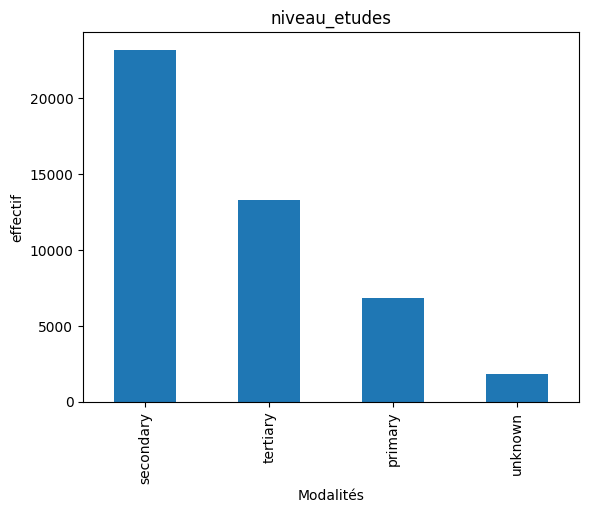

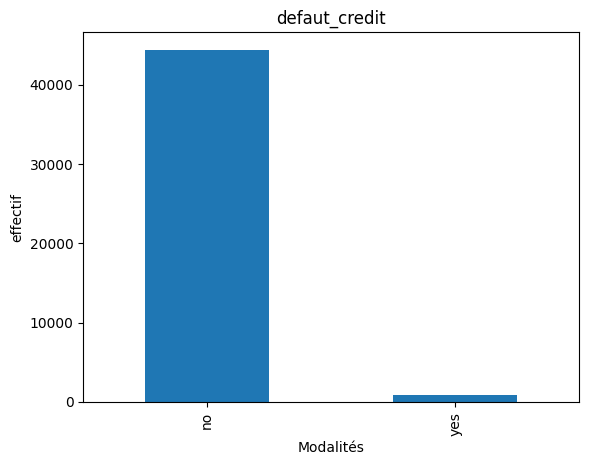

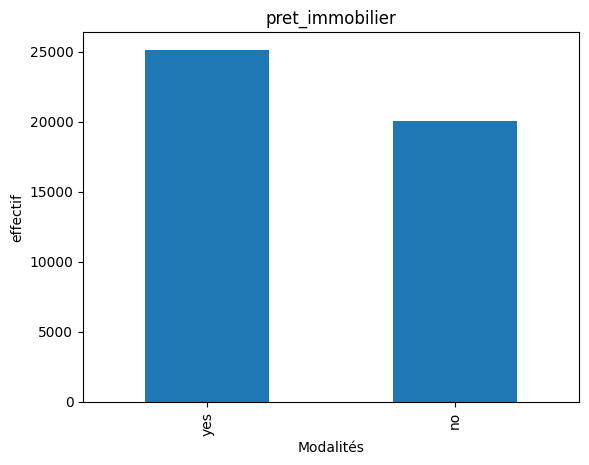

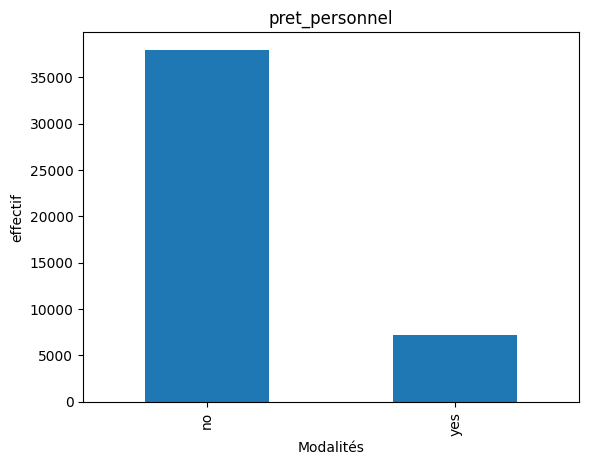

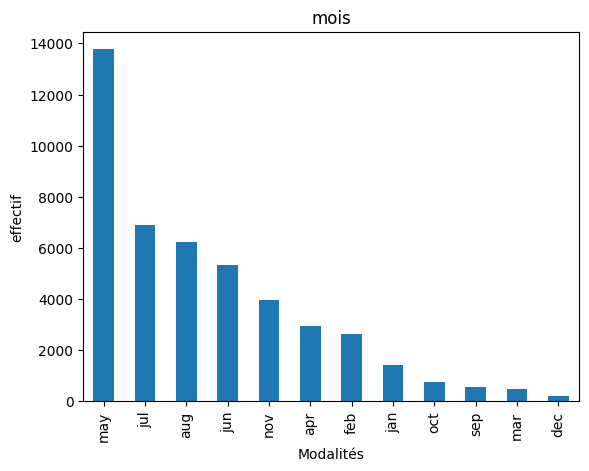

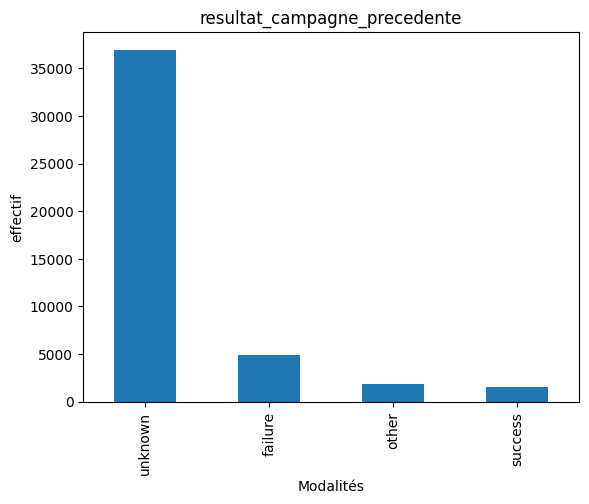

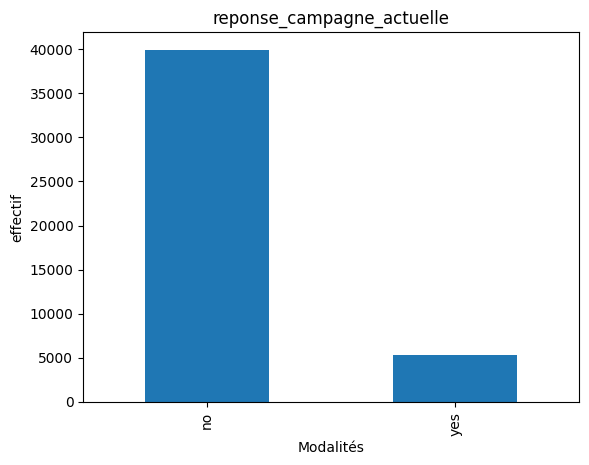

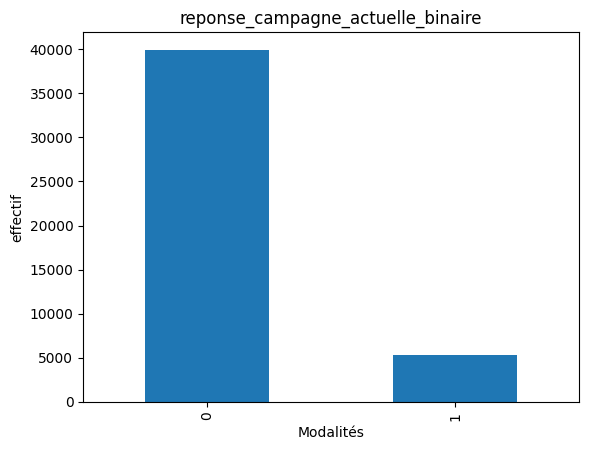

In [9]:
# Nous allons commencer par les variables categorielle
categories=['profession', 'situation_familiale' ,'niveau_etudes', 'defaut_credit','pret_immobilier','pret_personnel','mois',
            'resultat_campagne_precedente' 	,'reponse_campagne_actuelle','reponse_campagne_actuelle_binaire']
for categorie in categories:
    banque[categorie].value_counts().plot(kind='bar')
    plt.title(categorie)
    plt.xlabel('Modalités')
    plt.ylabel('effectif')
    plt.show()

Par exemple **Niveau scolaire** nous voyons qu'il y'a plus ceux qui ont un niveau secondaire suivi de tertiare ensuite de primaire .Peu de gens n ont pas renseigné leur profession

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


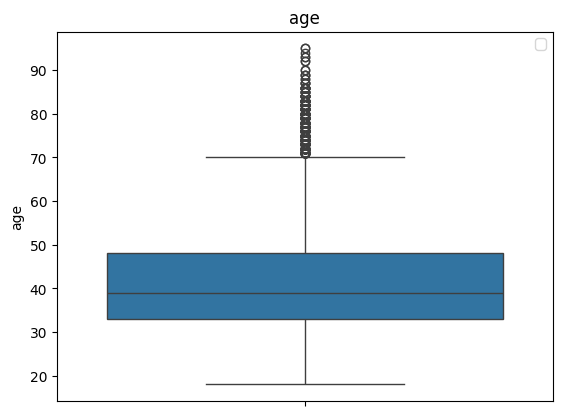

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


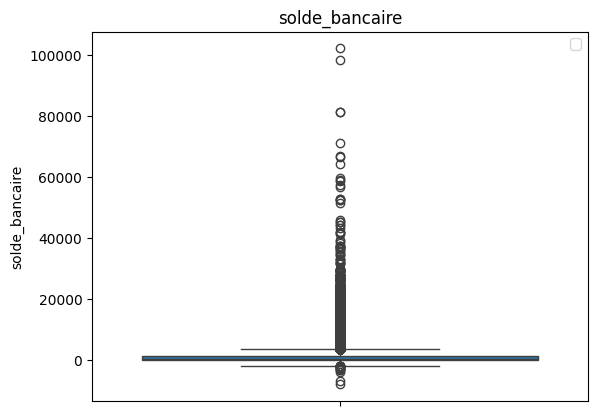

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


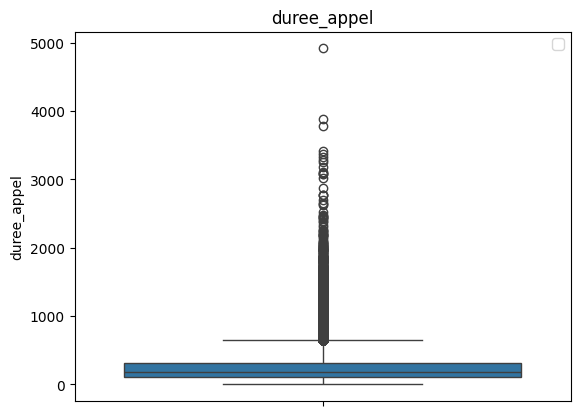

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


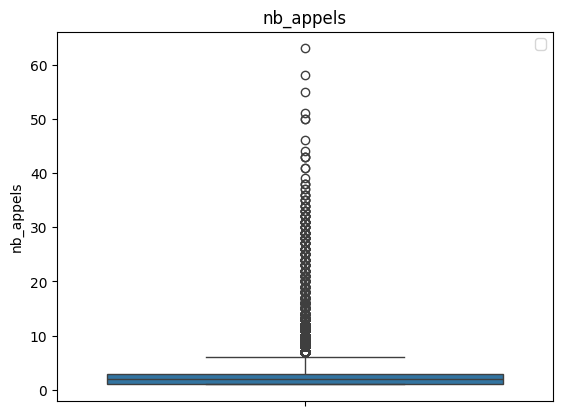

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


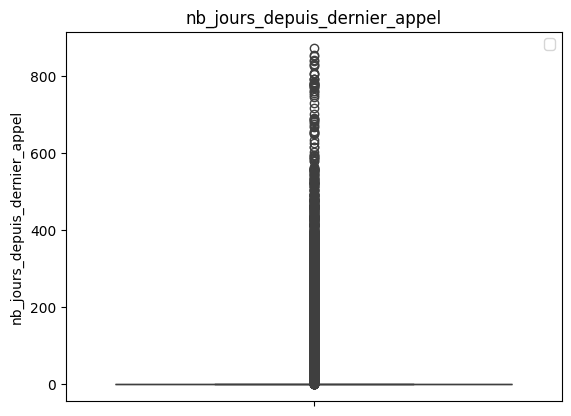

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\1906753585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


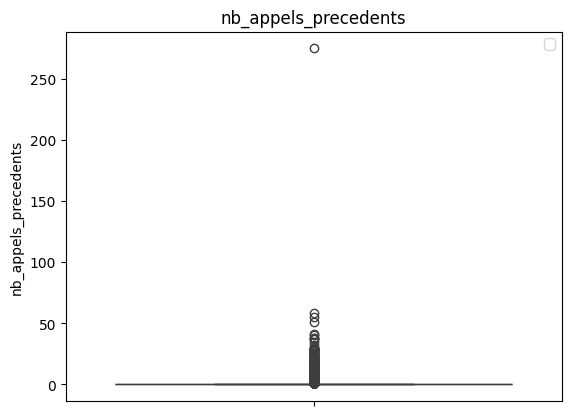

In [10]:
# variables numeriques
numeriques = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']
for variables in numeriques:
    sns.boxplot(data=banque,y=variables)
    plt.title(variables)
    plt.legend()
    plt.show()


### **Analyse Bivariée**

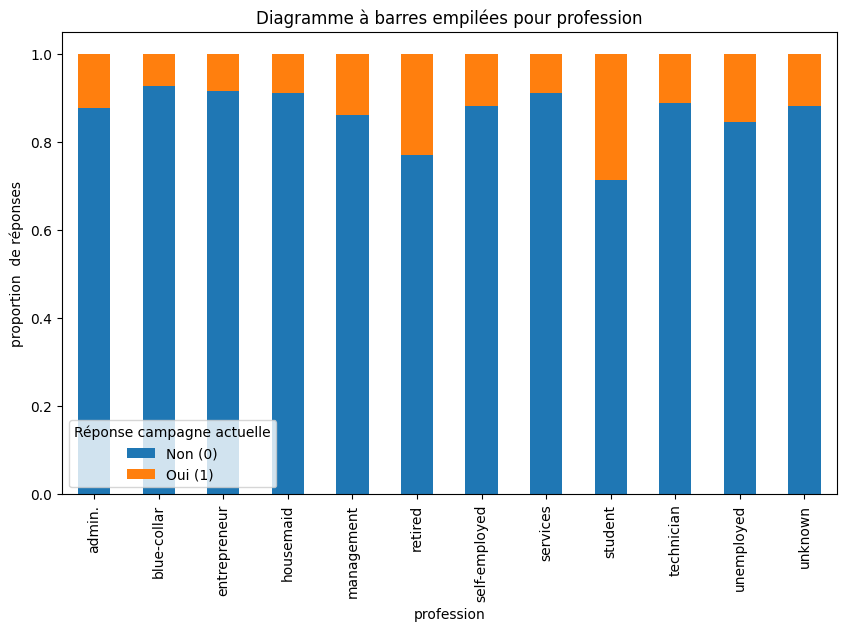

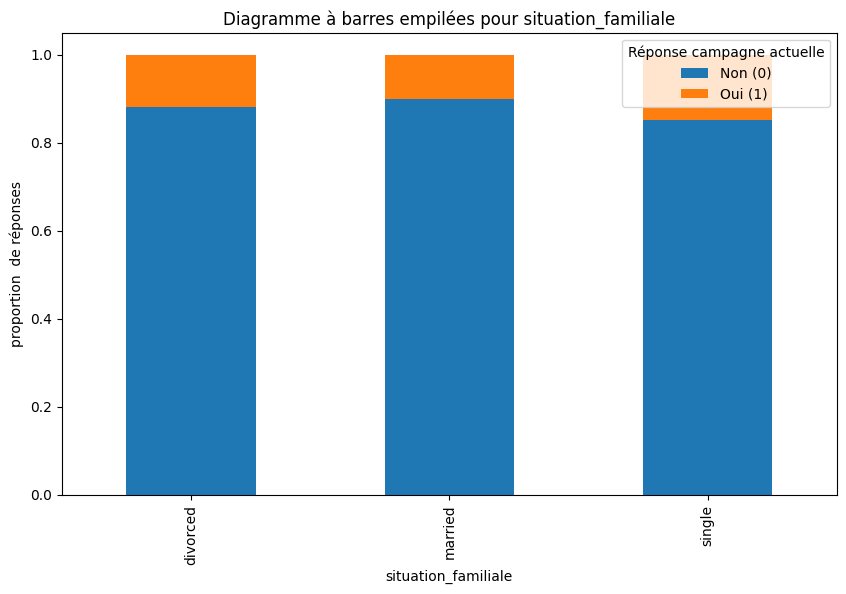

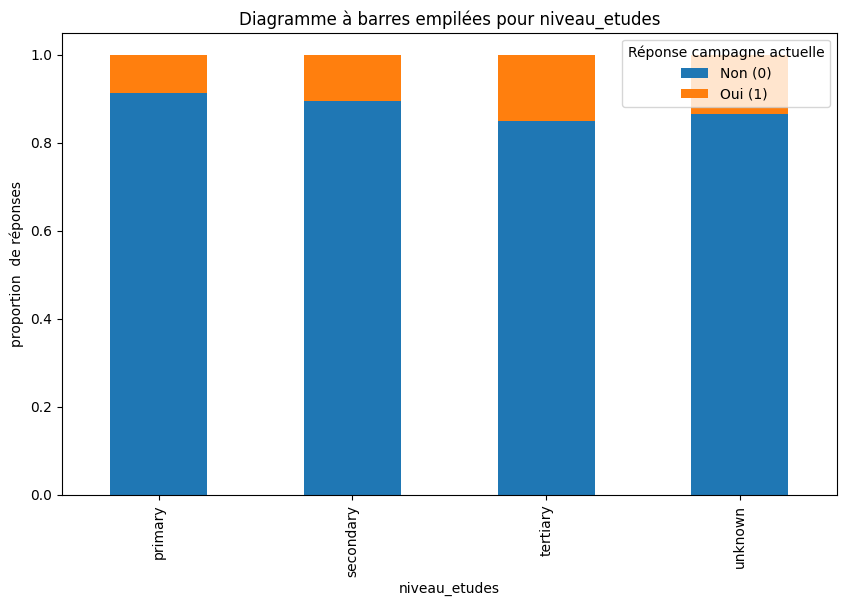

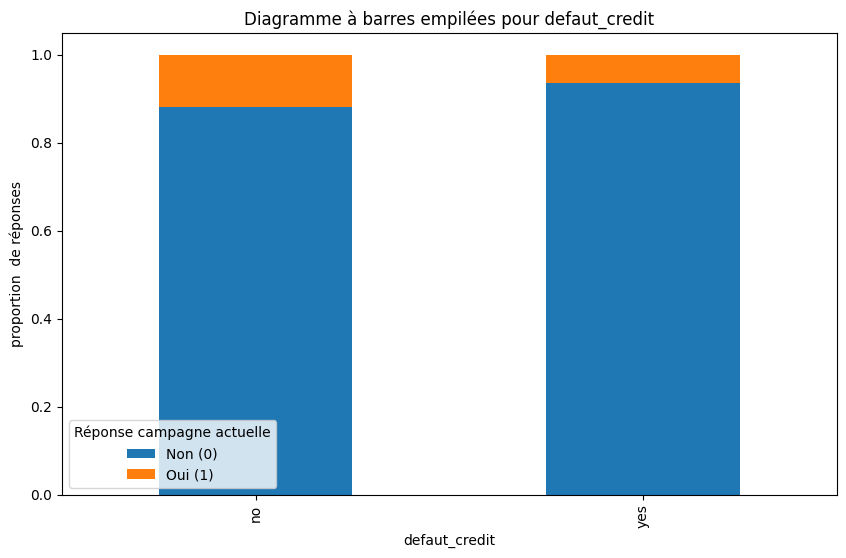

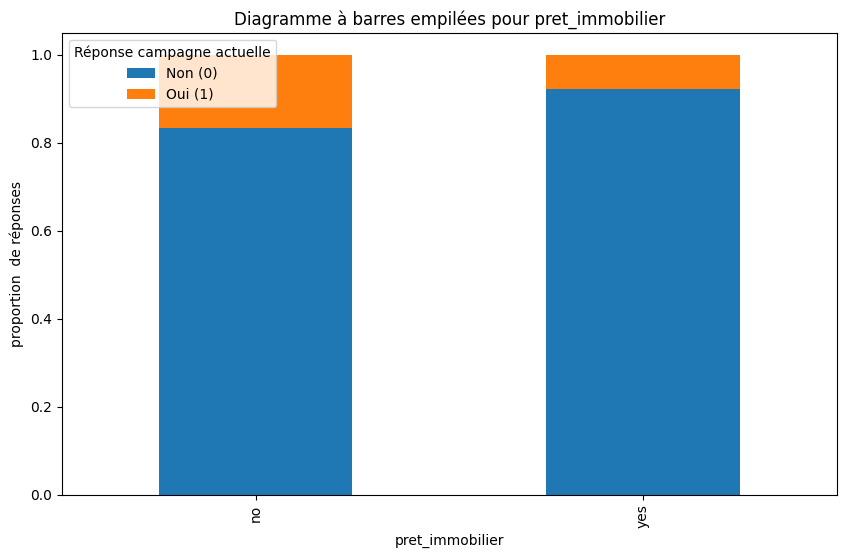

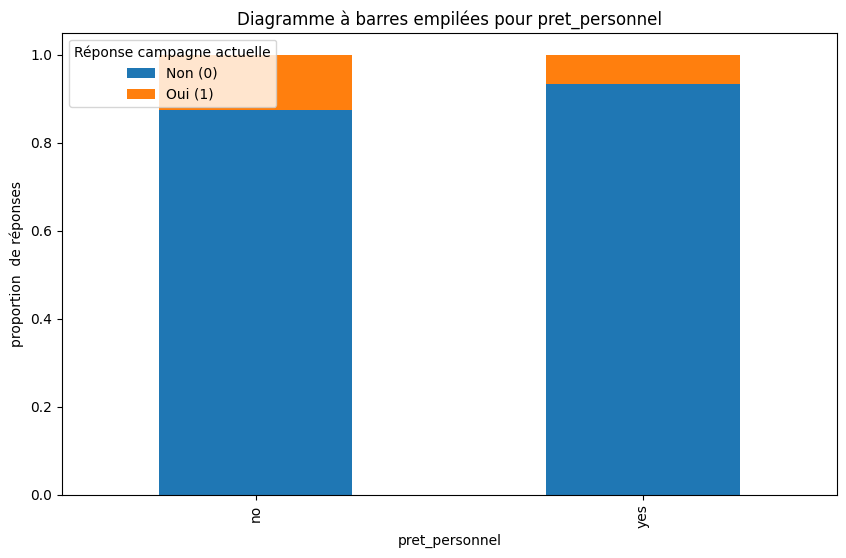

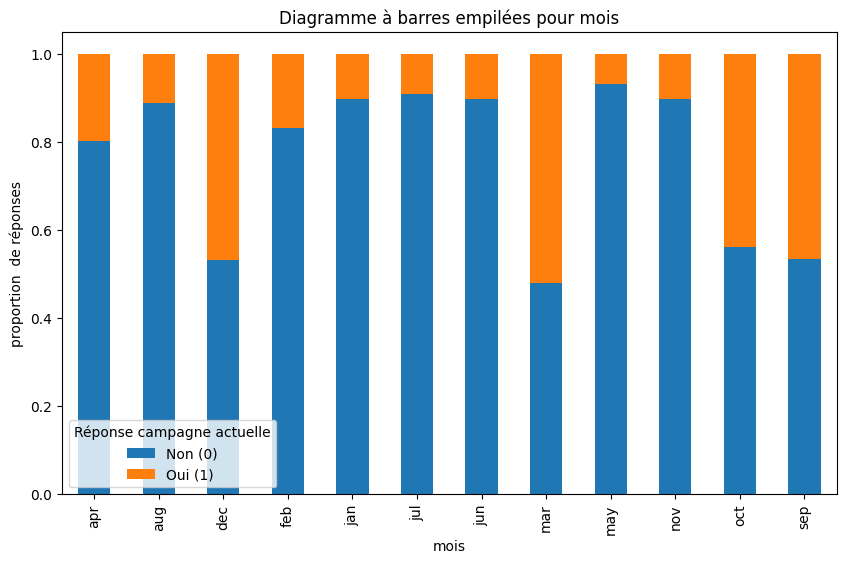

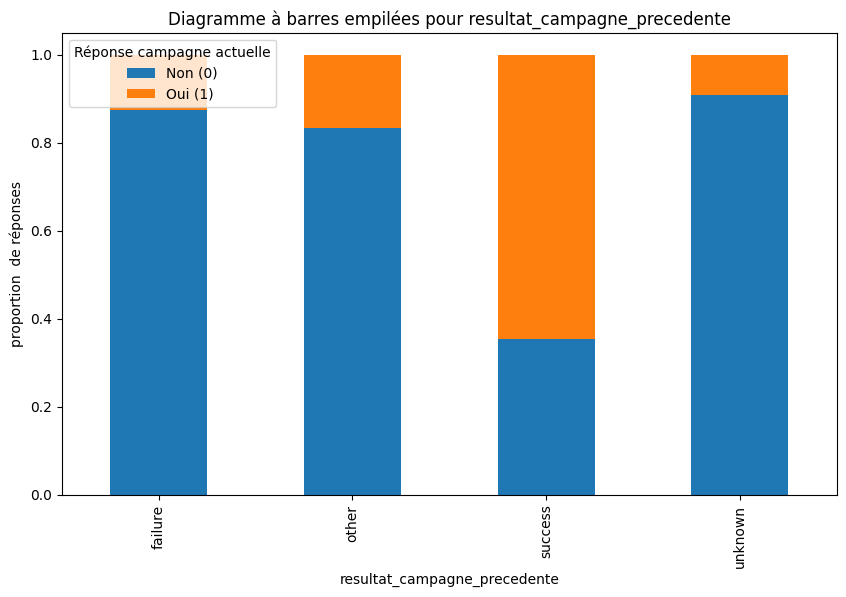

In [11]:
# on va analyser la relation entre les variables categorielles et la variable à predire
# suppresion de la variable a predire dans la liste
for item in ['reponse_campagne_actuelle', 'reponse_campagne_actuelle_binaire']:
    if item in categories:
        categories.remove(item)
# generation des barplot des barplot des categories(en fonction des reponses campagne )
for categorie in categories:
    # Créez le tableau de contingence
    tableau = pd.crosstab(banque[categorie], banque['reponse_campagne_actuelle_binaire'],normalize='index')
    
    # Tracer le barplot empilé
    tableau.plot(kind="bar", stacked=True, figsize=(10, 6)) 
    plt.title(f'Diagramme à barres empilées pour {categorie}')
    plt.xlabel(categorie)
    plt.ylabel('proportion  de réponses')
    plt.legend(title='Réponse campagne actuelle', labels=['Non (0)', 'Oui (1)'])
    plt.show()

**profession**:On se rend compte que les élèves sont plus interessée que les autres catégories.faire pareille pour les autres variables 

In [12]:
#faisons a present le test de Khi2
Nom_categorie=[]
chi2_stats=[]
p_values=[]
cramer_vs=[]
from scipy.stats import chi2_contingency
for categorie in categories:
    tableau1 = pd.crosstab(banque[categorie], banque['reponse_campagne_actuelle_binaire'])
    statistique_chi2, p_value, degres_de_liberte, valeurs_attendues = chi2_contingency(tableau1)
    #calcul du V de crammer
    n = tableau1.values.sum()
    k = tableau1.shape[0]  # Nombre de niveaux de la première variable
    r = tableau1.shape[1]  # Nombre de niveaux de la deuxième variable
    v_de_cramer = np.sqrt(statistique_chi2 / (n * min(k - 1, r - 1)))
     # Ajouter les résultats aux listes correspondantes
    Nom_categorie.append(categorie)
    chi2_stats.append(statistique_chi2)
    p_values.append(p_value)
    cramer_vs.append(v_de_cramer)


# Créer un DataFrame avec les résultats
resultat = pd.DataFrame({
    'Variable': Nom_categorie,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})
resultat.sort_values(by='V de Cramer', inplace=True,ascending=False)
resultat

,Variable,Chi2,P-valeur,V de Cramer
7,resultat_campagne_precedente,4391.506589,0.000000e+00,0.311663
6,mois,3061.838938,0.000000e+00,0.260237
4,pret_immobilier,874.822449,2.918798e-192,0.139103
0,profession,836.105488,3.337122e-172,0.135990
2,niveau_etudes,238.923506,1.626656e-51,0.072695
5,pret_personnel,209.616980,1.665061e-47,0.068091
1,situation_familiale,196.495946,2.145100e-43,0.065926
3,defaut_credit,22.202250,2.453861e-06,0.022160


Nous nous rendons compte que toutes les P_valeurs sont inferieures à 0,05 donc toute les variables categorielles sont liés a la variables predictive 

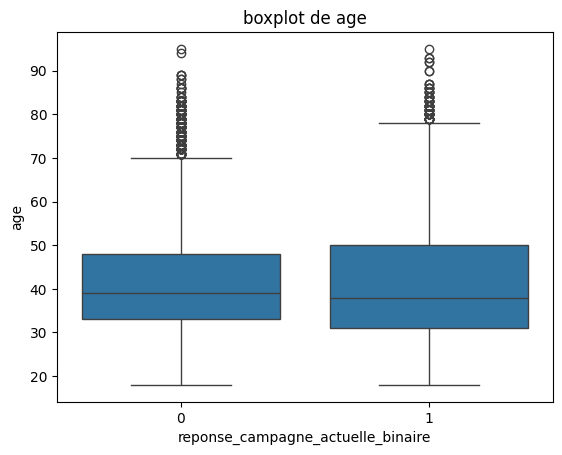

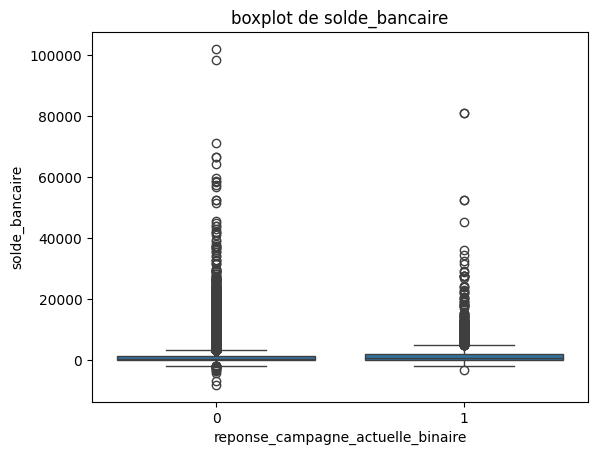

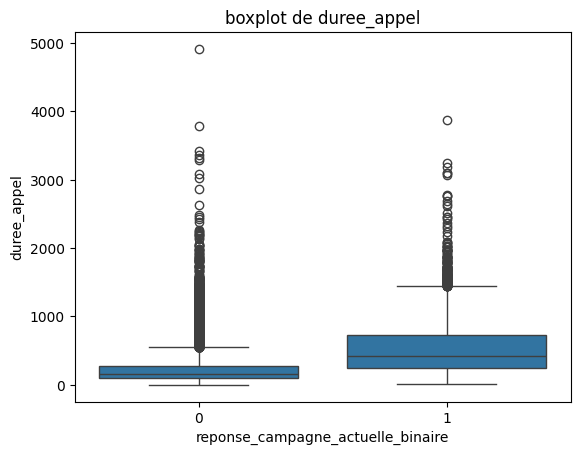

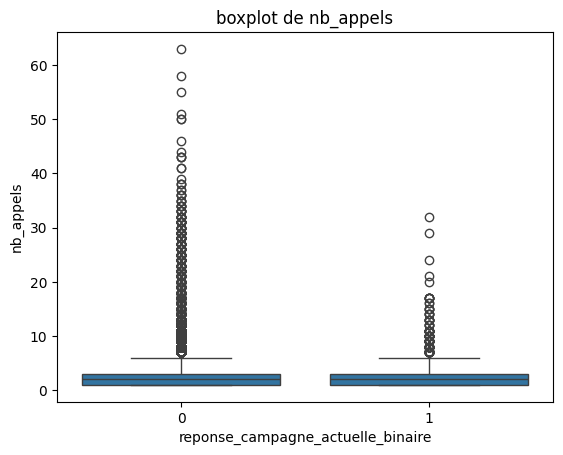

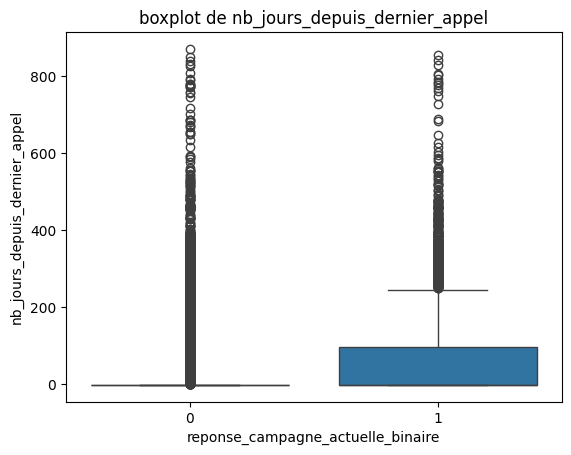

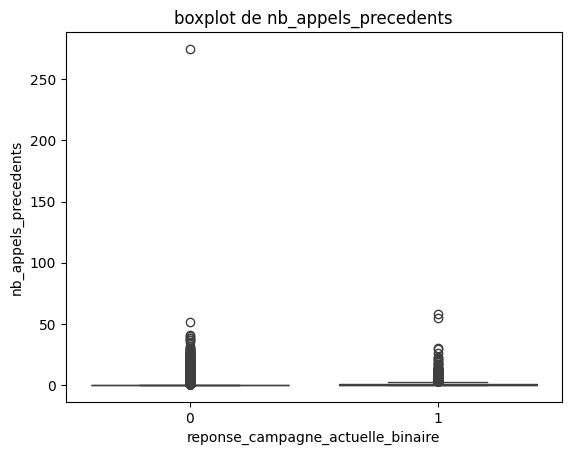

In [13]:
# box plot pour les variables numerique 
for variable in numeriques:
    sns.boxplot(data=banque,x='reponse_campagne_actuelle_binaire',y=variable)
    plt.title(f'boxplot de {variable}')
    plt.show()

Au vu du boxplot de  **durée d appel**on se rend compte que ceux qui disent oui sont ceux qui durent le plus au téléphone.plus on aduré au telephone avec la personne plus elle est interssée.

Pour **Age** on se rend compte que ceux qui ne sont pas interessé sont un peu plus agé

In [14]:
# nous allons mettre en place un test statistique pour confirmer ou infirmer nos hypotheses
# commencons par le test de de shapiro pour la normalité 
from scipy.stats import shapiro
from scipy.stats import levene

In [15]:
variables=[]
P_valeur=[]
for variable in numeriques:
    stat,p_value=shapiro(banque[variable])
    variables.append(variable)
    P_valeur.append(p_value)

resultats=pd.DataFrame({
    'variables':variables,
    'p_valeur':P_valeur
})
resultats.sort_values(by='p_valeur', inplace=True,ascending=False)
resultats

c:\Users\nangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


,variables,p_valeur
0,age,5.198013e-73
2,duree_appel,2.471509e-121
3,nb_appels,8.804094e-136
4,nb_jours_depuis_dernier_appel,1.755633e-140
1,solde_bancaire,1.739818e-141
5,nb_appels_precedents,4.151047e-152


On se rend compte que toutes ces valeurs sont inferieures 0,05 donc on rejette l'hypothèse nulle . Ces variables ne suivent pas une loi de distribution normale donc il faut faire un test non parametrique **(kruskall wallis)**

In [16]:
# On ferra donc le test de Kruskall Wallis 
#creons une liste pour  stocKer les differents groupes 
variablek=[]
stats=[]
p_valeurK=[]
from scipy.stats import kruskal
for variable in numeriques:
    groupes=[banque[banque['reponse_campagne_actuelle_binaire']==0][variable], banque[banque['reponse_campagne_actuelle_binaire']==1][variable]]
    # test de kruskal
    stat,PKruskal=kruskal(*groupes)
    variablek.append(variable)
    stats.append(stat)
    p_valeurK.append(PKruskal)

#creation du dataframe pour afficher 
resultKruskal=pd.DataFrame({
    'variables':variablek,
    'stat':stats,
    'p_value':p_valeurK
})
resultKruskal.sort_values(by='p_value',inplace=True,ascending=False )
print(resultKruskal)

                       variables         stat        p_value
0                            age     3.461381   6.281783e-02
3                      nb_appels   319.408727   1.948470e-71
1                 solde_bancaire   454.774182  6.593767e-101
4  nb_jours_depuis_dernier_appel  1072.963591  2.484050e-235
5           nb_appels_precedents  1293.144416  3.491720e-283
2                    duree_appel  5302.445386   0.000000e+00


les P_value sont tous inferieurs à 0,05 ....donc la variable **'reponse_campagne_actuelle_binaire'** et toute les variables numériques sont liées 

## **Mise en place du Modele**

In [17]:
# séparation  des variables 
X=banque.iloc[:, 0:-2]
X = X.drop(columns='mois')
Y=banque.iloc[:,-1]
X

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,unknown


In [18]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
X = pd.get_dummies(X, columns=['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier',
                               'pret_personnel',  'resultat_campagne_precedente'], drop_first=True) # drop_First pour éviter la multicolinéarité des variables 
X = X.replace({False: 0, True: 1})
X

C:\Users\nangs\AppData\Local\Temp\ipykernel_36780\930699412.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({False: 0, True: 1})


,age,solde_bancaire,jour_du_mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,profession_blue-collar,profession_entrepreneur,profession_housemaid,...,situation_familiale_single,niveau_etudes_secondary,niveau_etudes_tertiary,niveau_etudes_unknown,defaut_credit_yes,pret_immobilier_yes,pret_personnel_yes,resultat_campagne_precedente_other,resultat_campagne_precedente_success,resultat_campagne_precedente_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [19]:
import statsmodels.api as sm
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# entrainement du modele 
model=sm.Logit(Y_train, X_train,)
ajust=model.fit()
#pour voir  la significativité de chaque variable 
print(ajust.summary())


Optimization terminated successfully.
         Current function value: 0.257051
         Iterations 8
                                   Logit Regression Results                                  
Dep. Variable:     reponse_campagne_actuelle_binaire   No. Observations:                36168
Model:                                         Logit   Df Residuals:                    36139
Method:                                          MLE   Df Model:                           28
Date:                               Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2840
Time:                                       20:32:01   Log-Likelihood:                -9297.0
converged:                                      True   LL-Null:                       -12985.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

### **Interpretation**

1) Notre modèle est statistiquement significatif car la p-valeur =0.00 est inférieur à 0.05.Ce qui signifie que parmi les variable choisit il existe au moins un coefficient différent de 0(c'est à dire la variable permet d expliquer le modèle)
2) on regarde maintenant si les coefficient associé a chaque varible sont statitisquement significatifs . Dans notre cas presque toutes les p-valeurs sont inférieurs à 0.05. Donc toutes ces variables ont un impact sur le fait que le client souscrit ou non a un dépot à terme
3) **Exemple pret_personnel_yes** étant donné que le coef du pret_personnel_yes est négatif et la P_value egale à 0, cela signifie que les gens qui ont un pret ont tendance à ne pas souscrire à un dépot à terme **(les chances a soustrire a un depot a terme est plus faible quand on a un pret personnel)**
4) **le Niveau d'étude d'une personne** ne contribue pas au fait de savoir si une personne soustrira ou pas un depot à terme.(Du coup on enlevera du modèle et on essayera d'entrainner a nouveau pour voir si cela améliore le modèle)
5) **durée d'appel** plus la durée d appel augmente plus le client pourra souscrire à un dépot à terme
Après avoir faire toutes ces modiffications,Nous allons verifier les performances du modèle sur la base test et sur la base train.

### **verification des  performances du modèle**

La métrique utilisée en classification c'est **l'AUC (l'aire sous la courbe ROC)**

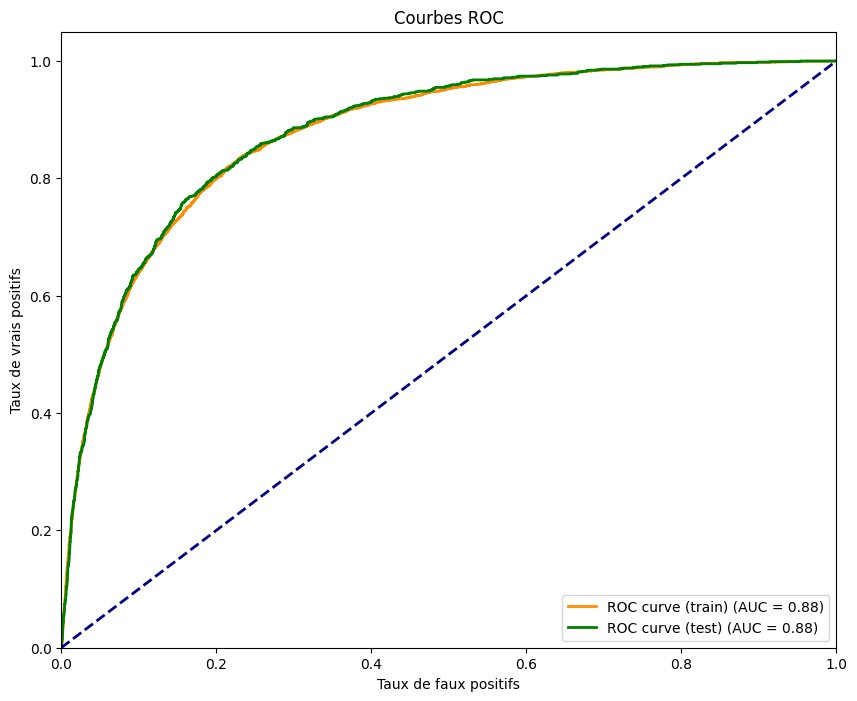

In [20]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
Y_train_pred = ajust.predict(X_train)
Y_test_pred = ajust.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, Y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

La courbe sur la base test et celle cur la base train sont presque similaires. Cela signifie qu'il n y a pas d'oversampling dans le modele
En plus AUC est de 0,88 (supérieur à 0,5 )cela signifie que le modele fait mieux que le hasard et ce nombre signifie que sur 100 clients qu on apppelle pour souscrire  à un depot à terme notre modele sera capable de prédire(savoir) si 90 vont souscrire ou pas au dépot à terme.sur 10 clients notre modèle aura la bonne prédiction sur 9 personnes 

In [21]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
Y_pred = ajust.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(Y_test, Y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043

